In [4]:
import pandas as pd
data = pd.read_csv('Retail_Sales_Data (1).csv')
print(data.head())


  Transaction Date Region Product Category  Quantity Sold  Sales Amount  \
0       2019-01-16   West       Home Decor              9        909.84   
1       2021-09-17  North         Clothing              8        900.29   
2       2020-03-27   East      Electronics              3        506.07   
3       2019-02-11  South         Clothing              9        744.70   
4       2020-01-15   East            Books              4        245.55   

     Customer Name                        Transaction ID  Payment Method  
0     Melinda Pham  7b094307-bcd3-4f16-84a7-2bca783fff4f     Credit Card  
1     Shelly Perez  fb437a2e-4ebf-4807-b84e-f2dfae83541a     Credit Card  
2      Scott White  b6ead965-ed1c-4bdc-95ac-864685467abd  Online Banking  
3  Gloria Williams  400773f4-a820-47b6-b3c4-2cc2a5467e73            Cash  
4     Michael Sims  10b62e7a-38f8-4f27-a989-b99b55d76223            Cash  


In [5]:
print(data.info())
print(data.isnull().sum())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction Date  100 non-null    object 
 1   Region            100 non-null    object 
 2   Product Category  100 non-null    object 
 3   Quantity Sold     100 non-null    int64  
 4   Sales Amount      100 non-null    float64
 5   Customer Name     100 non-null    object 
 6   Transaction ID    100 non-null    object 
 7   Payment Method    100 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 6.4+ KB
None
Transaction Date    0
Region              0
Product Category    0
Quantity Sold       0
Sales Amount        0
Customer Name       0
Transaction ID      0
Payment Method      0
dtype: int64
       Quantity Sold  Sales Amount
count     100.000000    100.000000
mean        5.700000    544.873300
std         2.904194    276.530738
min         1.000000     23.140

In [7]:
sales_by_region = data.groupby('Region')['Sales Amount'].sum().reset_index()
print(sales_by_region)


  Region  Sales Amount
0   East      14382.28
1  North      13031.74
2  South      11300.33
3   West      15772.98


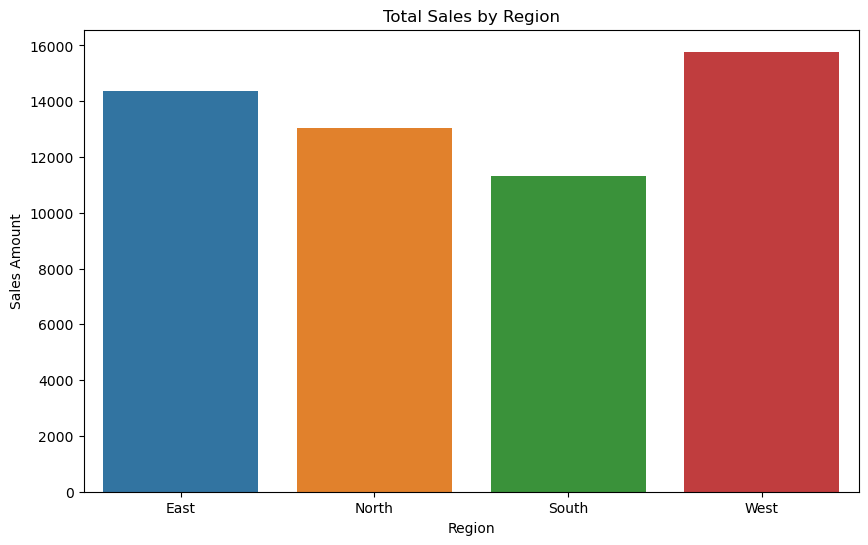

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='Sales Amount', data=sales_by_region)
plt.title('Total Sales by Region')
plt.ylabel('Sales Amount')
plt.xlabel('Region')
plt.show()


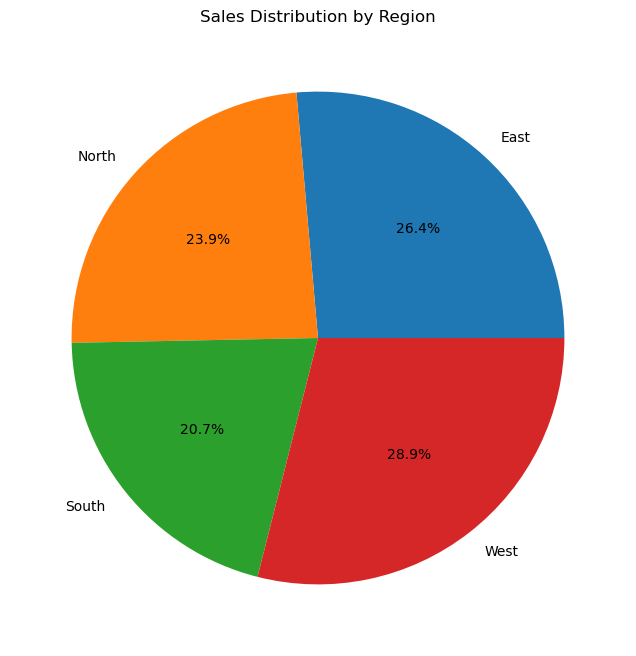

In [10]:
plt.figure(figsize=(8,8))
plt.pie(sales_by_region['Sales Amount'], labels=sales_by_region['Region'], autopct='%1.1f%%')
plt.title('Sales Distribution by Region')
plt.show()


In [12]:
top_regions = sales_by_region.sort_values(by='Sales Amount', ascending=False)
print(top_regions)


  Region  Sales Amount
3   West      15772.98
0   East      14382.28
1  North      13031.74
2  South      11300.33


In [17]:
sales_by_region_category = data.groupby(['Region', 'Product Category'])['Sales Amount'].sum().unstack().fillna(0)
print(sales_by_region_category)



Product Category    Books  Clothing  Electronics  Home Decor
Region                                                      
East               759.89   4293.54      6153.44     3175.41
North             2235.48   4121.55      3208.94     3465.77
South              573.38   4977.85      2581.59     3167.51
West              4907.12   3185.51      3043.47     4636.88


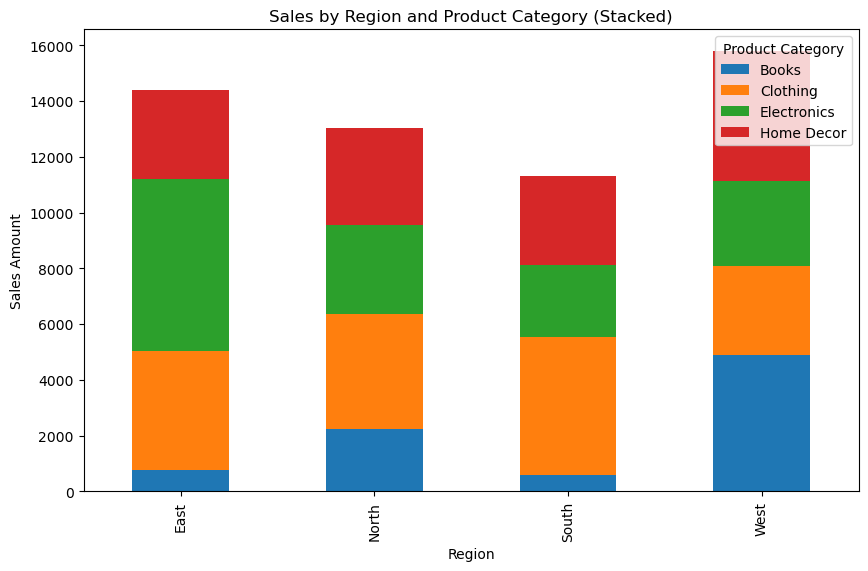

In [18]:

sales_by_region_category.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Sales by Region and Product Category (Stacked)')
plt.ylabel('Sales Amount')
plt.xlabel('Region')
plt.show()


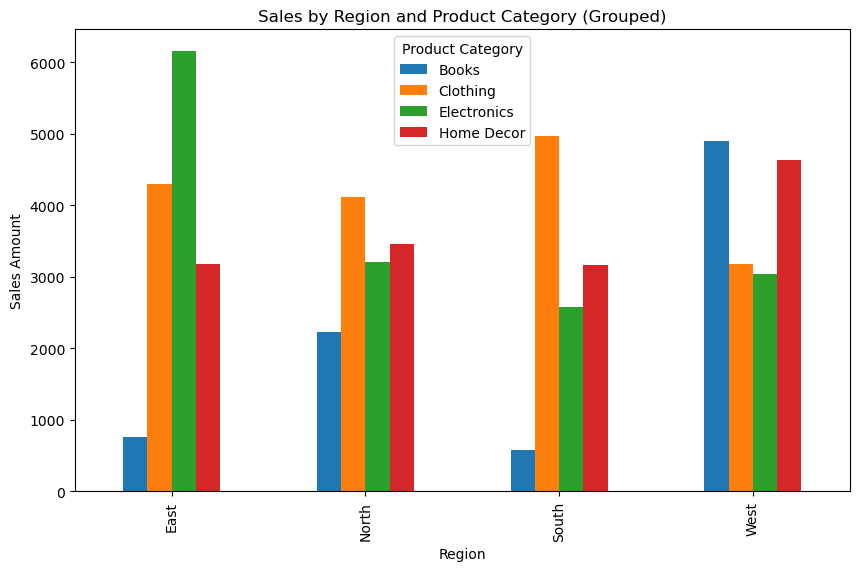

In [19]:
sales_by_region_category.plot(kind='bar', figsize=(10,6))
plt.title('Sales by Region and Product Category (Grouped)')
plt.ylabel('Sales Amount')
plt.xlabel('Region')
plt.show()
